In [1]:
import pandas as pd
import matplotlib.pyplot as plt, matplotlib
from statsmodels.tsa.api import VAR

In [2]:
csvs = """
../fx_data/normalized_test_data.csv
../fx_data/normalized_test_data_log.csv
../fx_data/normalized_training_data.csv
../fx_data/normalized_training_data_log.csv
../will_data/normalized_test_data.csv
../will_data/normalized_test_data_log.csv
../will_data/normalized_training_data.csv
../will_data/normalized_training_data_log.csv
../will_data/cross_validated_data/cv_norm_precovid_test1.csv
../will_data/cross_validated_data/cv_norm_precovid_test2.csv
../will_data/cross_validated_data/cv_norm_precovid_test3.csv
../will_data/cross_validated_data/cv_norm_precovid_test4.csv
../will_data/cross_validated_data/cv_norm_precovid_test5.csv
../will_data/cross_validated_data/cv_norm_precovid_train1.csv
../will_data/cross_validated_data/cv_norm_precovid_train2.csv
../will_data/cross_validated_data/cv_norm_precovid_train3.csv
../will_data/cross_validated_data/cv_norm_precovid_train4.csv
../will_data/cross_validated_data/cv_norm_precovid_train5.csv
../will_data/sameer_data/cv_norm_precovid_test1.csv
../will_data/sameer_data/cv_norm_precovid_test2.csv
../will_data/sameer_data/cv_norm_precovid_test3.csv
../will_data/sameer_data/cv_norm_precovid_test4.csv
../will_data/sameer_data/cv_norm_precovid_test5.csv
../will_data/sameer_data/cv_raw_precovid_test1.csv
../will_data/sameer_data/cv_raw_precovid_test2.csv
../will_data/sameer_data/cv_raw_precovid_test3.csv
../will_data/sameer_data/cv_raw_precovid_test4.csv
../will_data/sameer_data/cv_raw_precovid_test5.csv
""".strip().splitlines()
import os
assert all(os.path.exists(csv) for csv in csvs)

trains = [csv for csv in csvs if 'train' in csv]
tests = [csv for csv in csvs if 'test' in csv]


../fx_data/normalized_training_data.csv


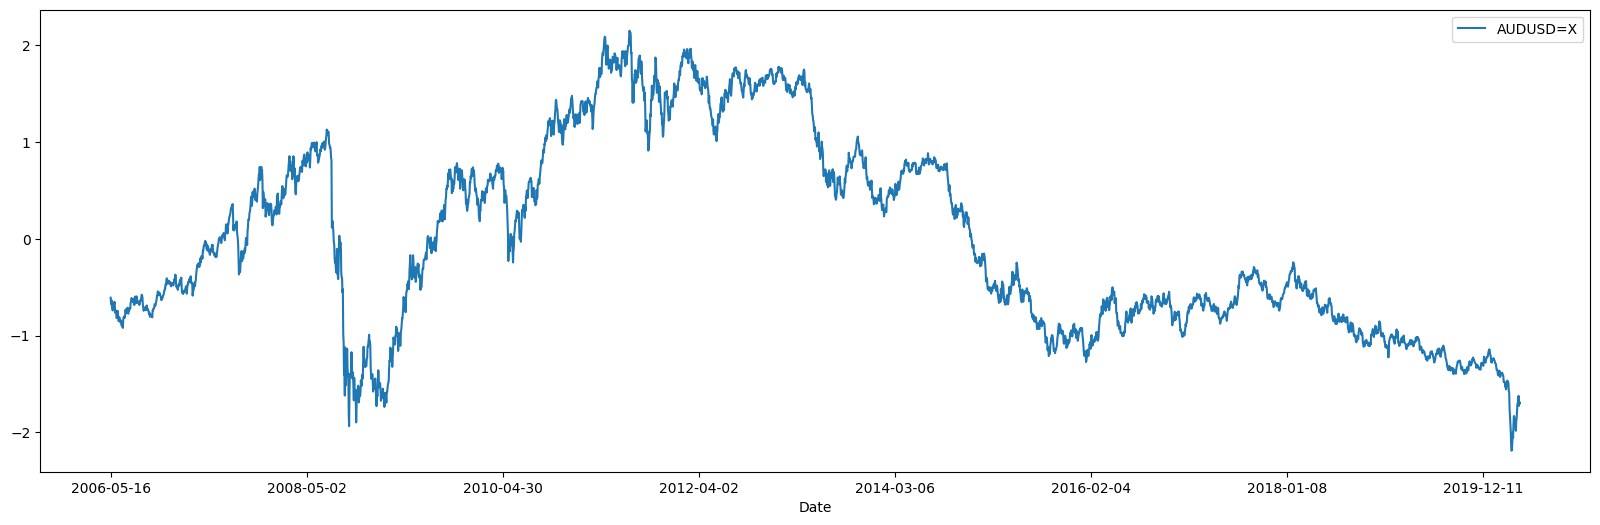

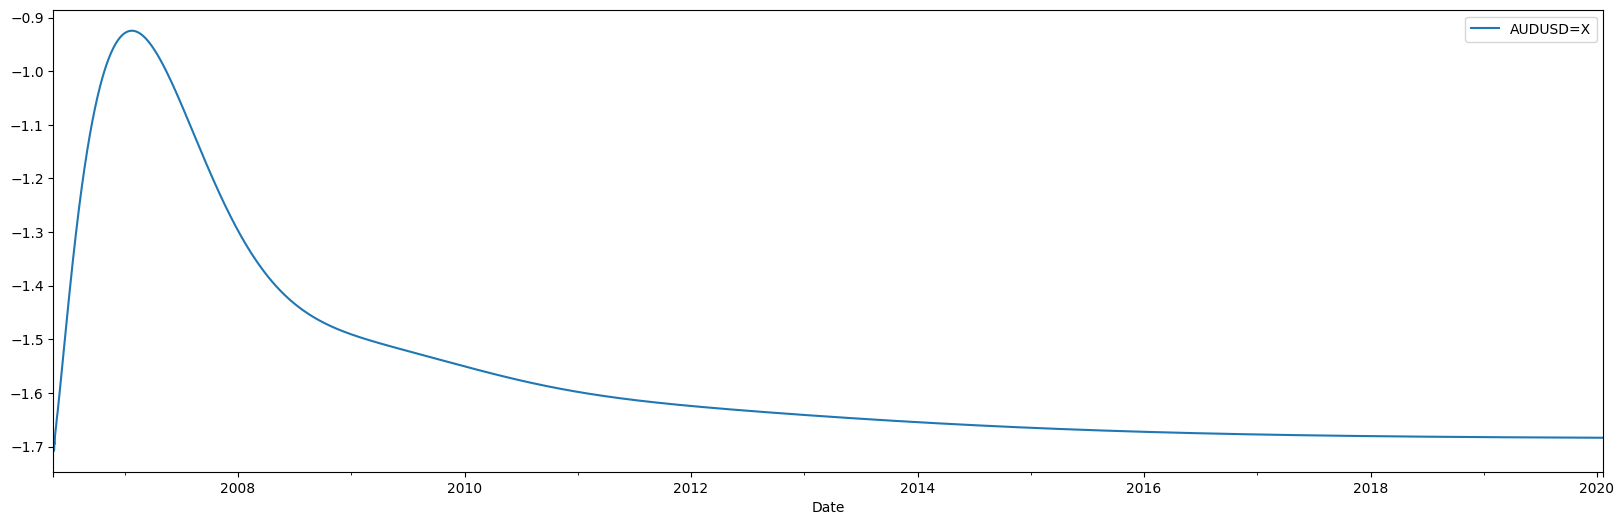

../fx_data/normalized_training_data_log.csv


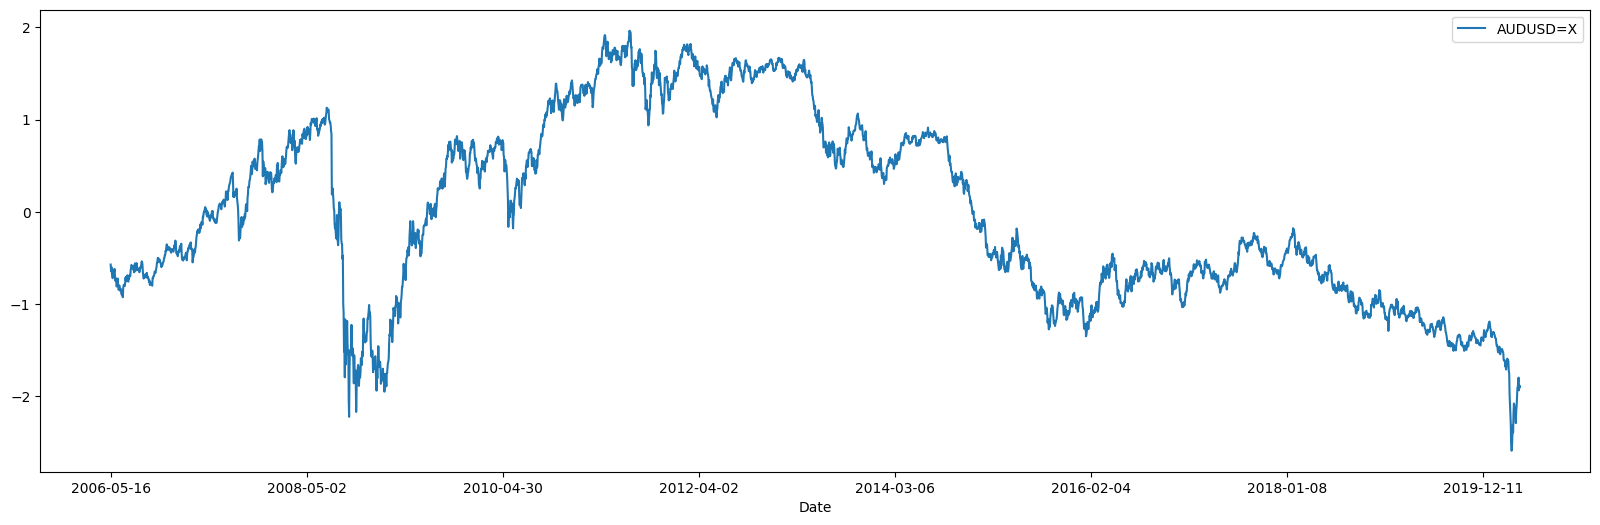

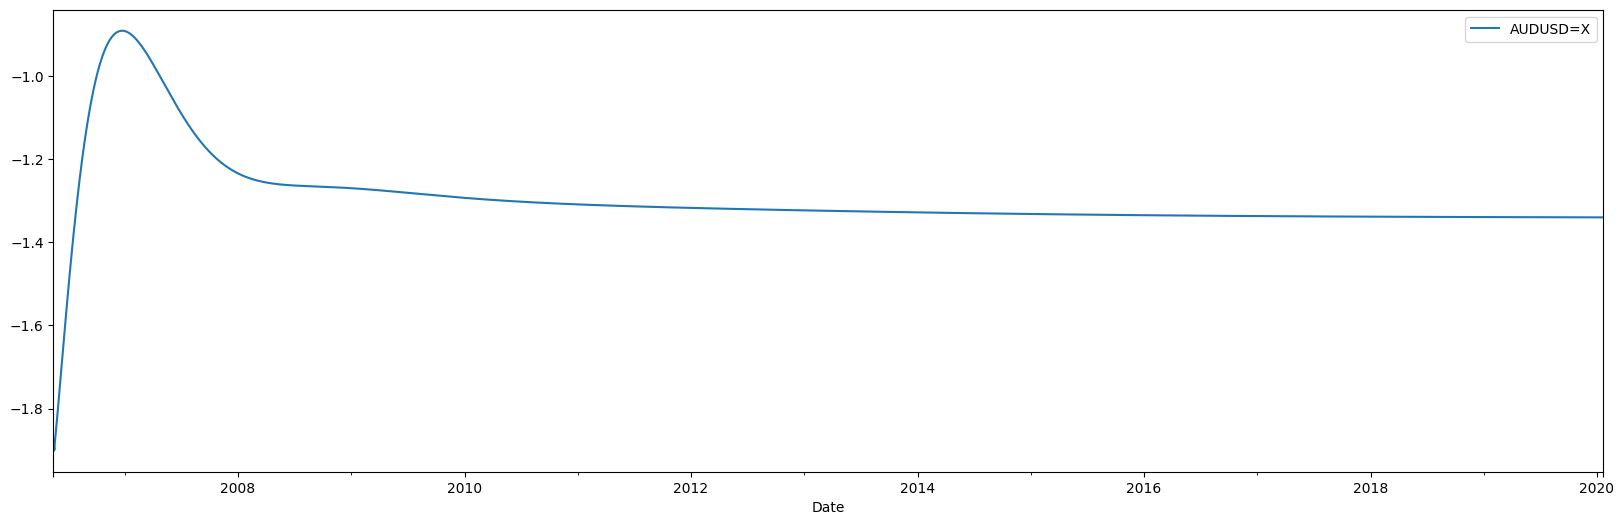

../will_data/normalized_training_data.csv


KeyError: 'Date'

In [38]:
matplotlib.rcParams['figure.figsize'] = (20, 6)
for csv in trains:
    print(csv)
    csv = pd.read_csv(csv)
    if 'Date' in csv.columns: dropped_csv = csv.drop(columns='Date')
    var = VAR(dropped_csv)
    order = var.select_order().selected_orders['aic'] # aic, bic, fpe, hqic
    results = var.fit(order)
    forecast_input = dropped_csv.values[-order:]
    pred = results.forecast(y=forecast_input, steps=5000) 
    idx = pd.date_range(csv['Date'][0], periods=5000)
    df_forecast=pd.DataFrame(data=pred,columns=dropped_csv.columns.values)
    df_forecast['Date'] = idx;
    # print(df_forecast)

    # idx1 = pd.date_range(csv['Date'][0], periods=1000)
    # df_forecast1=pd.DataFrame(data=dropped_csv, index=idx1, columns=dropped_csv.columns.values)
    ax = csv.plot(x='Date', y='AUDUSD=X', legend=True)
    df_forecast.plot(x='Date', y='AUDUSD=X', legend=True)
    # df_forecast1['AUDUSD=X'].plot(legend=True)
    # print(df_forecast)
    plt.show()
